In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
dataset = pd.DataFrame(pd.read_csv('creditcard.csv'))

In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
dataset[dataset.Time.isnull() == True ]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [7]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
dataset[['Time', 'Amount']] = sc.fit_transform(dataset[['Time', 'Amount']])

In [14]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [15]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [16]:
x

array([[-1.99658302, -1.35980713, -0.07278117, ...,  0.13355838,
        -0.02105305,  0.24496426],
       [-1.99658302,  1.19185711,  0.26615071, ..., -0.0089831 ,
         0.01472417, -0.34247454],
       [-1.99656197, -1.35835406, -1.34016307, ..., -0.05535279,
        -0.05975184,  1.16068593],
       ...,
       [ 1.6419735 ,  1.91956501, -0.30125385, ...,  0.00445477,
        -0.02656083, -0.0818393 ],
       [ 1.6419735 , -0.24044005,  0.53048251, ...,  0.10882073,
         0.10453282, -0.31324853],
       [ 1.64205773, -0.53341252, -0.18973334, ..., -0.00241531,
         0.01364891,  0.51435531]])

In [17]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### split in train and test data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x.shape

(284807, 30)

In [20]:
y.shape


(284807,)

In [21]:
X_train,X_test,  Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state= 0 )
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

In [22]:
X_train.shape

(159491, 30)

In [23]:
Y_train.shape


(159491,)

In [24]:

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

In [25]:
network = Sequential()

In [26]:
network.add(layers.Dense(10, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)))
network.add(layers.Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
network.add(layers.Dense(1, activation='sigmoid'))

In [27]:
network.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [28]:
network_history = network.fit(X_train, Y_train, epochs=10, batch_size=500, validation_data=(X_val, Y_val))


Epoch 1/10
319/319 [==============================] - 6s 12ms/step - loss: 0.3204 - accuracy: 0.9924 - val_loss: 0.0426 - val_accuracy: 0.9981
Epoch 2/10
319/319 [==============================] - 1s 3ms/step - loss: 0.0369 - accuracy: 0.9985 - val_loss: 0.0262 - val_accuracy: 0.9992
Epoch 3/10
319/319 [==============================] - 1s 3ms/step - loss: 0.0246 - accuracy: 0.9991 - val_loss: 0.0202 - val_accuracy: 0.9992
Epoch 4/10
319/319 [==============================] - 1s 4ms/step - loss: 0.0193 - accuracy: 0.9992 - val_loss: 0.0160 - val_accuracy: 0.9994
Epoch 5/10
319/319 [==============================] - 1s 4ms/step - loss: 0.0152 - accuracy: 0.9993 - val_loss: 0.0130 - val_accuracy: 0.9994
Epoch 6/10
319/319 [==============================] - 1s 4ms/step - loss: 0.0126 - accuracy: 0.9993 - val_loss: 0.0108 - val_accuracy: 0.9994
Epoch 7/10
319/319 [==============================] - 1s 3ms/step - loss: 0.0111 - accuracy: 0.9992 - val_loss: 0.0089 - val_accuracy: 0.9995
Epoch

In [29]:
train_loss = network_history.history['loss']

In [30]:
val_loss = network_history.history['val_loss']

In [31]:
epochs = range(1,11)

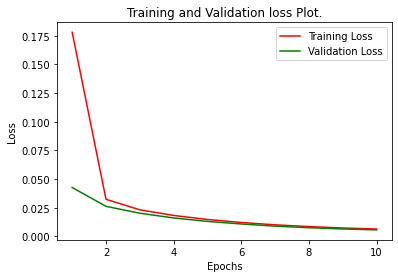

In [32]:

plt.plot(epochs, train_loss, 'r', label='Training Loss' )
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation loss Plot.')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
network.predict(X_test)

array([[0.00074014],
       [0.00063834],
       [0.00073278],
       ...,
       [0.0005528 ],
       [0.00061446],
       [0.00132695]], dtype=float32)

In [34]:
network.evaluate(X_test, Y_test)


2671/2671 [==============================] - 5s 2ms/step - loss: 0.0060 - accuracy: 0.9994


[0.005968417506664991, 0.9994148015975952]